In [1]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess

In [28]:
delta = 1
epsilon = 0.4
#check legal:
print(epsilon<delta/(1+delta))
N=5
# W = -2*np.ones((N,N))
wi=-1-delta
we=-1+epsilon
W = np.array([[0,we,we],
              [we,0,we],
              [wi,wi,0]])
# W = np.array([[0,wi,we,we,wi],
#               [we,0,wi,we,wi],
#               [wi,we,0,wi,wi],
#               [wi,wi,wi,0,we],
#               [wi,we,wi,wi,0]])
# W = np.array([[0,we,wi,we,wi],
#               [wi,0,wi,wi,we],
#               [wi,we,0,we,wi],
#               [wi,wi,wi,0,we],
#               [we,wi,we,wi,0]]).T
bs = np.ones(N)
dt=0.1
wcstring = cf.make_ctln(W, bs, dt=dt)
with open('ctln_p.ode', 'w') as f:
    f.writelines(wcstring)

True


In [29]:
np.linalg.det(np.array([[1,2,0.6],[1,1,2],[1,0.6,1]]))

1.5599999999999996

In [30]:
# np.linalg.eig(-np.ones(N)+W)

<IPython.core.display.Javascript object>


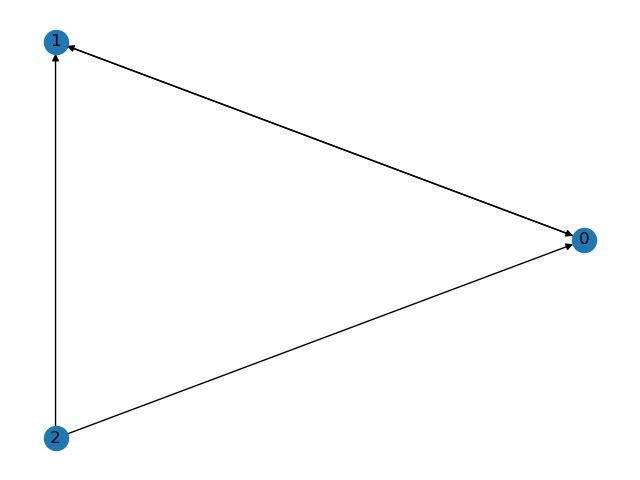

array([[0, 1, 0],
       [1, 0, 0],
       [1, 1, 0]])

In [31]:
%matplotlib notebook

G=nx.from_numpy_matrix(np.where(np.logical_and(W>-1,W<0),1,0).T,create_using=nx.DiGraph())
nx.draw_circular(G, with_labels=True)
np.where(np.logical_and(W>-1,W<0),1,0).T

<IPython.core.display.Javascript object>


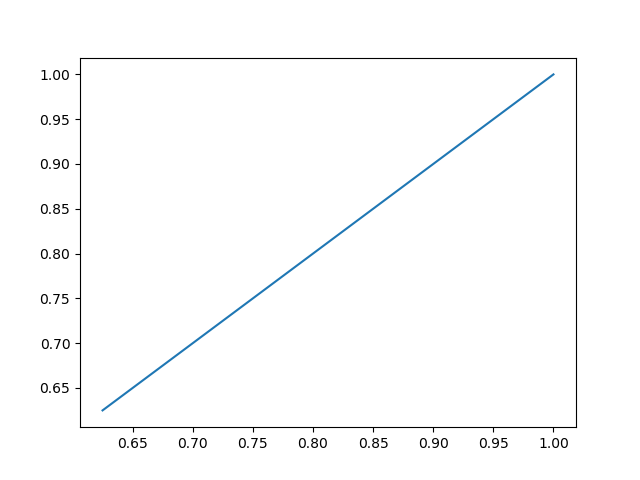

In [32]:
inits = [1.,1.,.0,.0,.0]#.5*np.ones(N)#[.1,.1,.1,.1,.1]##[5/18,5/18,5/18,5/18,5/18]
inits_dict={}
for i,init in enumerate(inits[:]):
    inits_dict['x'+str(i+1)]=init
%matplotlib notebook
npa, vn = xpprun('ctln_p.ode',inits=inits_dict, parameters={'total':50}, clean_after=True)
shift=0
plt.plot(npa[shift:,1], npa[shift:,2], '-')
# x=npa[-1,1:]
# -x[0]+np.dot(W.T[0,:],x)+1

<IPython.core.display.Javascript object>


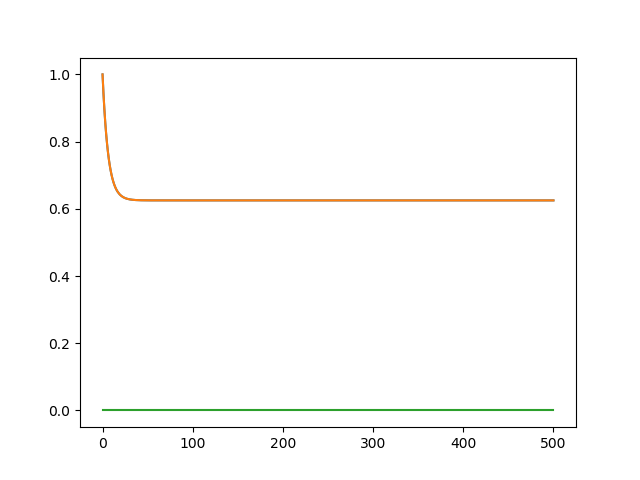

In [33]:
%matplotlib notebook

plt.plot(npa[:,1:])

In [34]:
x=npa[-1,1:]
x

array([0.625, 0.625, 0.   ])

In [36]:
# -x[0]+we*x[1]+wi*x[2]+we*x[3]+wi*x[4]+1

In [37]:
W[0,:]

array([ 0. , -0.6, -0.6])

<IPython.core.display.Javascript object>


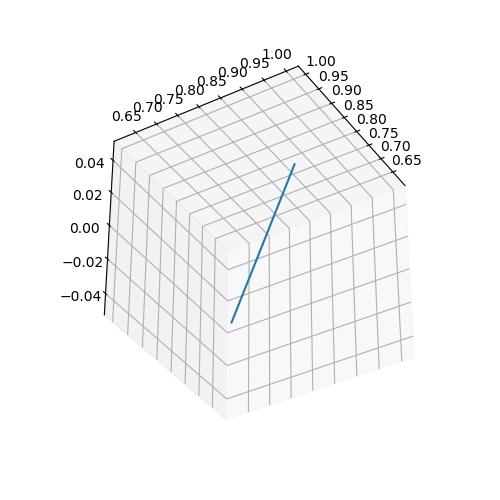

In [38]:
%matplotlib notebook

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(npa[:,1], npa[:,2],npa[:,3])